In [1]:
import numpy as np
import pandas as pd

# Assuming your data is stored in a variable named 'data'
# Data should be a 2D numpy array where each row represents a sample and each column represents a feature
# Shape of 'data' should be (number of samples, number of features)





C:\Users\dilli\AppData\Local\Temp\ipykernel_16548\480601281.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv('telecomStandardized.csv')
df.sample(5)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3757,0,0,1,0,0.042254,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
5275,1,1,0,0,0.056338,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
5109,1,0,0,0,0.915493,0,0,1,0,1,...,1,0,0,0,0,1,1,0,0,0
1972,0,1,0,0,0.422535,1,1,0,1,0,...,0,1,0,1,0,0,0,0,1,0
6529,0,0,0,0,0.014085,1,0,0,0,1,...,0,1,0,1,0,0,0,0,1,0


In [3]:
data = df.drop('Churn',axis='columns')
labels = df['Churn']
data.sample(5)
#labels.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6329,0,0,0,0,0.000000,1,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
373,1,0,1,1,0.774648,1,1,0,1,1,...,0,1,0,0,1,0,0,1,0,0
2747,0,0,1,1,0.422535,0,0,1,0,0,...,1,0,0,1,0,0,1,0,0,0
5623,0,0,0,0,0.802817,1,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0
5593,0,0,0,0,0.070423,1,0,1,0,1,...,1,0,0,0,0,1,0,0,0,1


In [4]:
# Step 1: Standardization
mean = np.mean(data, axis=0)
std_dev = np.std(data, axis=0)
standardized_data = (data - mean) / std_dev

# Step 2: Compute Covariance Matrix
cov_matrix = np.cov(standardized_data, rowvar=False)

# Step 3: Compute Eigenvalues and Eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Step 4: Select Principal Components
k = 20  # Select top k principal components
sorted_indices = np.argsort(eigenvalues)[::-1]  # Sort eigenvalues in descending order
selected_indices = sorted_indices[:k]  # Select top k indices
principal_components = eigenvectors[:, selected_indices]

# Step 5: Transform the Data
reduced_data = np.dot(standardized_data, principal_components)

# Now you can use reduced_data for classification


In [5]:
print(reduced_data.shape)

(7032, 20)


In [6]:

# For example, you can use any classification algorithm like logistic regression, decision trees, etc.
# Here's a simple example using logistic regression from scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Assuming 'labels' contains the target labels for each sample
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(reduced_data, labels, test_size=0.2, random_state=15)

# Create and train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluate the model
accuracy = model.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.8152096659559346


In [7]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Make predictions
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Create confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.8152096659559346
Confusion Matrix:
[[953  87]
 [173 194]]


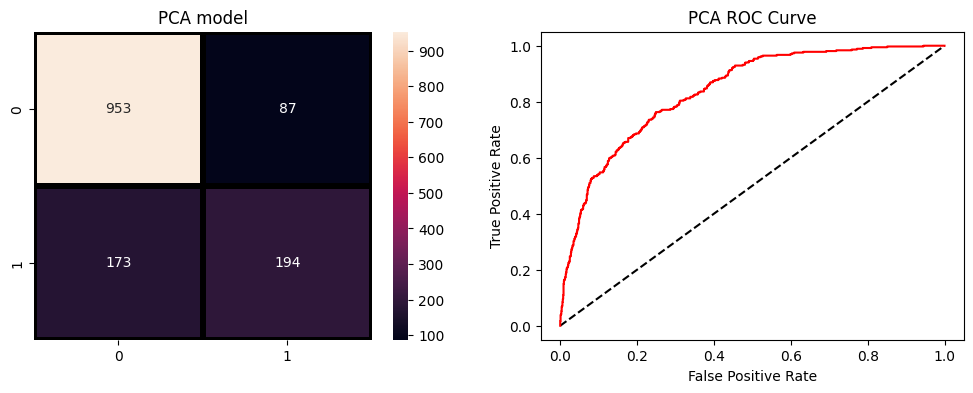

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, confusion_matrix
from sklearn.svm import SVC

# Assuming 'svm' is the trained SVM model
# and 'X_test', 'y_test' are the test data
y_pred = model.predict(X_test)

# Confusion Matrix
plt.figure(figsize=(12, 4))
plt.subplot(1,2,1)
sns.heatmap(confusion_matrix(y_test, y_pred),
            annot=True, fmt="d", linecolor="k", linewidths=3)
plt.title("PCA model")

# ROC Curve
y_pred_prob = model.decision_function(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.subplot(1,2,2)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='PCA performed model', color="r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('PCA ROC Curve')
plt.show()